In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Import and warehouse data: [ Score: 5 point ]
• Import all the given datasets from MYSQL server. Explore shape and size. 

• Merge all datasets onto one and explore final shape and size

In [2]:
df1 = pd.read_csv(r'C:\Users\Barca\Downloads\TelcomCustomer-Churn_1.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
df1.shape

(7043, 10)

In [4]:
df1.size

70430

In [5]:
df2 = pd.read_csv(r'C:\Users\Barca\Downloads\TelcomCustomer-Churn2.csv')
df2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df2.shape

(7043, 11)

In [7]:
df2.size

77473

In [8]:
df3 = pd.concat([df1,df2], axis = 1)
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df3.shape

(7043, 21)

## 2. Data cleansing: [ Score: 10 point ]
• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [10]:
df3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
import warnings
warnings.simplefilter('ignore')

In [13]:
s = (df3.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['Partner'].value_counts()


No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['Partner']= label_encoder.fit_transform(df3['Partner'])
  
df3['Partner'].unique()

array([1, 0], dtype=int64)

In [16]:
df3['gender']= label_encoder.fit_transform(df3['gender'])
  
df3['gender'].unique()

array([0, 1], dtype=int64)

In [17]:
df3['Dependents']= label_encoder.fit_transform(df3['Dependents'])
  
df3['Dependents'].unique()

array([0, 1], dtype=int64)

In [18]:
df3['PhoneService']= label_encoder.fit_transform(df3['PhoneService'])
  
df3['PhoneService'].unique()

array([0, 1], dtype=int64)

In [19]:
df3['MultipleLines']= label_encoder.fit_transform(df3['MultipleLines'])
  
df3['MultipleLines'].unique()

array([1, 0, 2], dtype=int64)

In [20]:
df3['InternetService']= label_encoder.fit_transform(df3['InternetService'])
  
df3['InternetService'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
df3['OnlineSecurity'] = label_encoder.fit_transform(df3['OnlineSecurity'])
  
df3['OnlineSecurity'].unique()

array([0, 2, 1], dtype=int64)

In [22]:
df3['OnlineBackup'] = label_encoder.fit_transform(df3['OnlineBackup'])
  
df3['OnlineBackup'].unique()

array([2, 0, 1], dtype=int64)

In [23]:
df3['DeviceProtection'] = label_encoder.fit_transform(df3['DeviceProtection'])
  
df3['DeviceProtection'].unique()

array([0, 2, 1], dtype=int64)

In [24]:
df3['TechSupport'] = label_encoder.fit_transform(df3['TechSupport'])
  
df3['TechSupport'].unique()

array([0, 2, 1], dtype=int64)

In [25]:
df3['StreamingTV'] = label_encoder.fit_transform(df3['StreamingTV'])
  
df3['StreamingTV'].unique()

array([0, 2, 1], dtype=int64)

In [26]:
df3['StreamingMovies'] = label_encoder.fit_transform(df3['StreamingMovies'])
  
df3['StreamingMovies'].unique()

array([0, 2, 1], dtype=int64)

In [27]:
df3['Contract'] = label_encoder.fit_transform(df3['Contract'])
  
df3['Contract'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
df3['PaperlessBilling'] = label_encoder.fit_transform(df3['PaperlessBilling'])
  
df3['PaperlessBilling'].unique()

array([1, 0], dtype=int64)

In [29]:
df3['PaymentMethod'] = label_encoder.fit_transform(df3['PaymentMethod'])
  
df3['PaymentMethod'].unique()

array([2, 3, 0, 1], dtype=int64)

In [30]:
df3['TotalCharges'] = label_encoder.fit_transform(df3['TotalCharges'])
  
df3['TotalCharges'].unique()

array([2505, 1466,  157, ..., 2994, 2660, 5407], dtype=int64)

In [31]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,Yes


In [32]:
## gender indicates male as 1 and female as 0



In [33]:
df4=df3.drop('customerID', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,Yes


In [34]:
df4=df4.drop('OnlineSecurity', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,2,0,0,0,0,0,1,2,29.85,2505,No
1,1,0,0,0,34,1,0,0,0,2,0,0,0,1,0,3,56.95,1466,No
2,1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,53.85,157,Yes
3,1,0,0,0,45,0,1,0,0,2,2,0,0,1,0,0,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70,925,Yes


In [35]:
df4=df4.drop('DeviceProtection', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,2,0,0,0,0,1,2,29.85,2505,No
1,1,0,0,0,34,1,0,0,0,0,0,0,1,0,3,56.95,1466,No
2,1,0,0,0,2,1,0,0,2,0,0,0,0,1,3,53.85,157,Yes
3,1,0,0,0,45,0,1,0,0,2,0,0,1,0,0,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,925,Yes


In [36]:
df4=df4.drop('PaymentMethod', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,2,0,0,0,0,1,29.85,2505,No
1,1,0,0,0,34,1,0,0,0,0,0,0,1,0,56.95,1466,No
2,1,0,0,0,2,1,0,0,2,0,0,0,0,1,53.85,157,Yes
3,1,0,0,0,45,0,1,0,0,2,0,0,1,0,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,70.70,925,Yes


In [37]:
df4=df4.drop('PaperlessBilling', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,2,0,0,0,0,29.85,2505,No
1,1,0,0,0,34,1,0,0,0,0,0,0,1,56.95,1466,No
2,1,0,0,0,2,1,0,0,2,0,0,0,0,53.85,157,Yes
3,1,0,0,0,45,0,1,0,0,2,0,0,1,42.30,1400,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,70.70,925,Yes


## 3. Data analysis & visualisation: [ Score: 10 point ]
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [38]:
df4.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.906432,0.797104,0.985376,0.992475,0.690473,64.761692,3257.794122
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.880162,0.861551,0.885002,0.885091,0.833755,30.090047,1888.693496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,1609.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,70.350000,3249.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,89.850000,4901.500000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,118.750000,6530.000000


## univariate

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

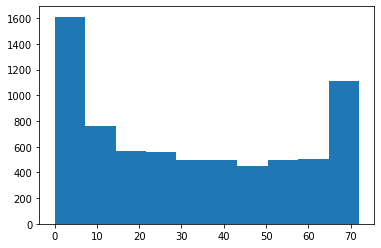

In [39]:
plt.hist(df4['tenure'], bins = 10)

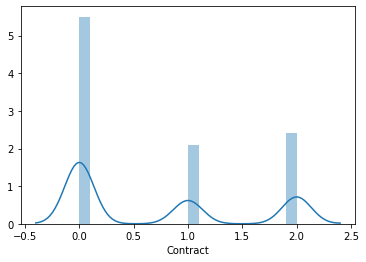

In [40]:
sns.distplot(df4['Contract'])

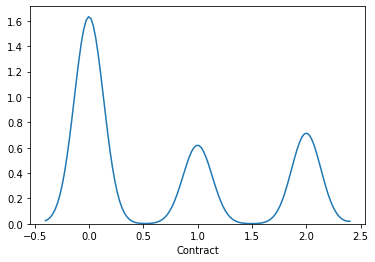

In [41]:
sns.distplot(df4['Contract'], hist = False)

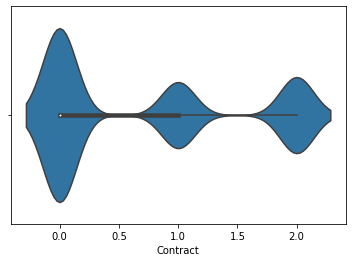

In [42]:
sns.violinplot(df4['Contract'])

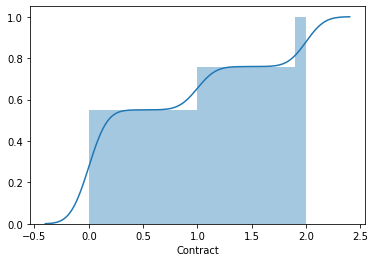

In [43]:
sns.distplot(df4['Contract'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

## bivariate

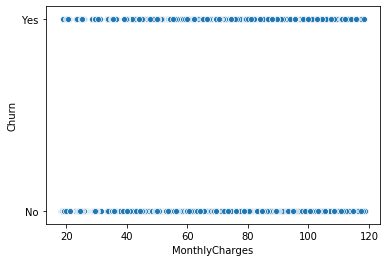

In [44]:
sns.scatterplot(df4['MonthlyCharges'], df4['Churn'])

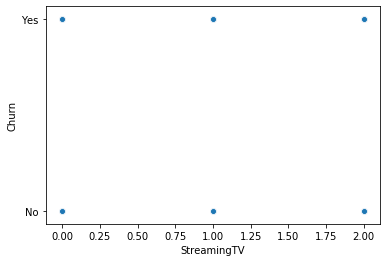

In [45]:
sns.scatterplot(df4['StreamingTV'], df4['Churn'])

## Multivariate

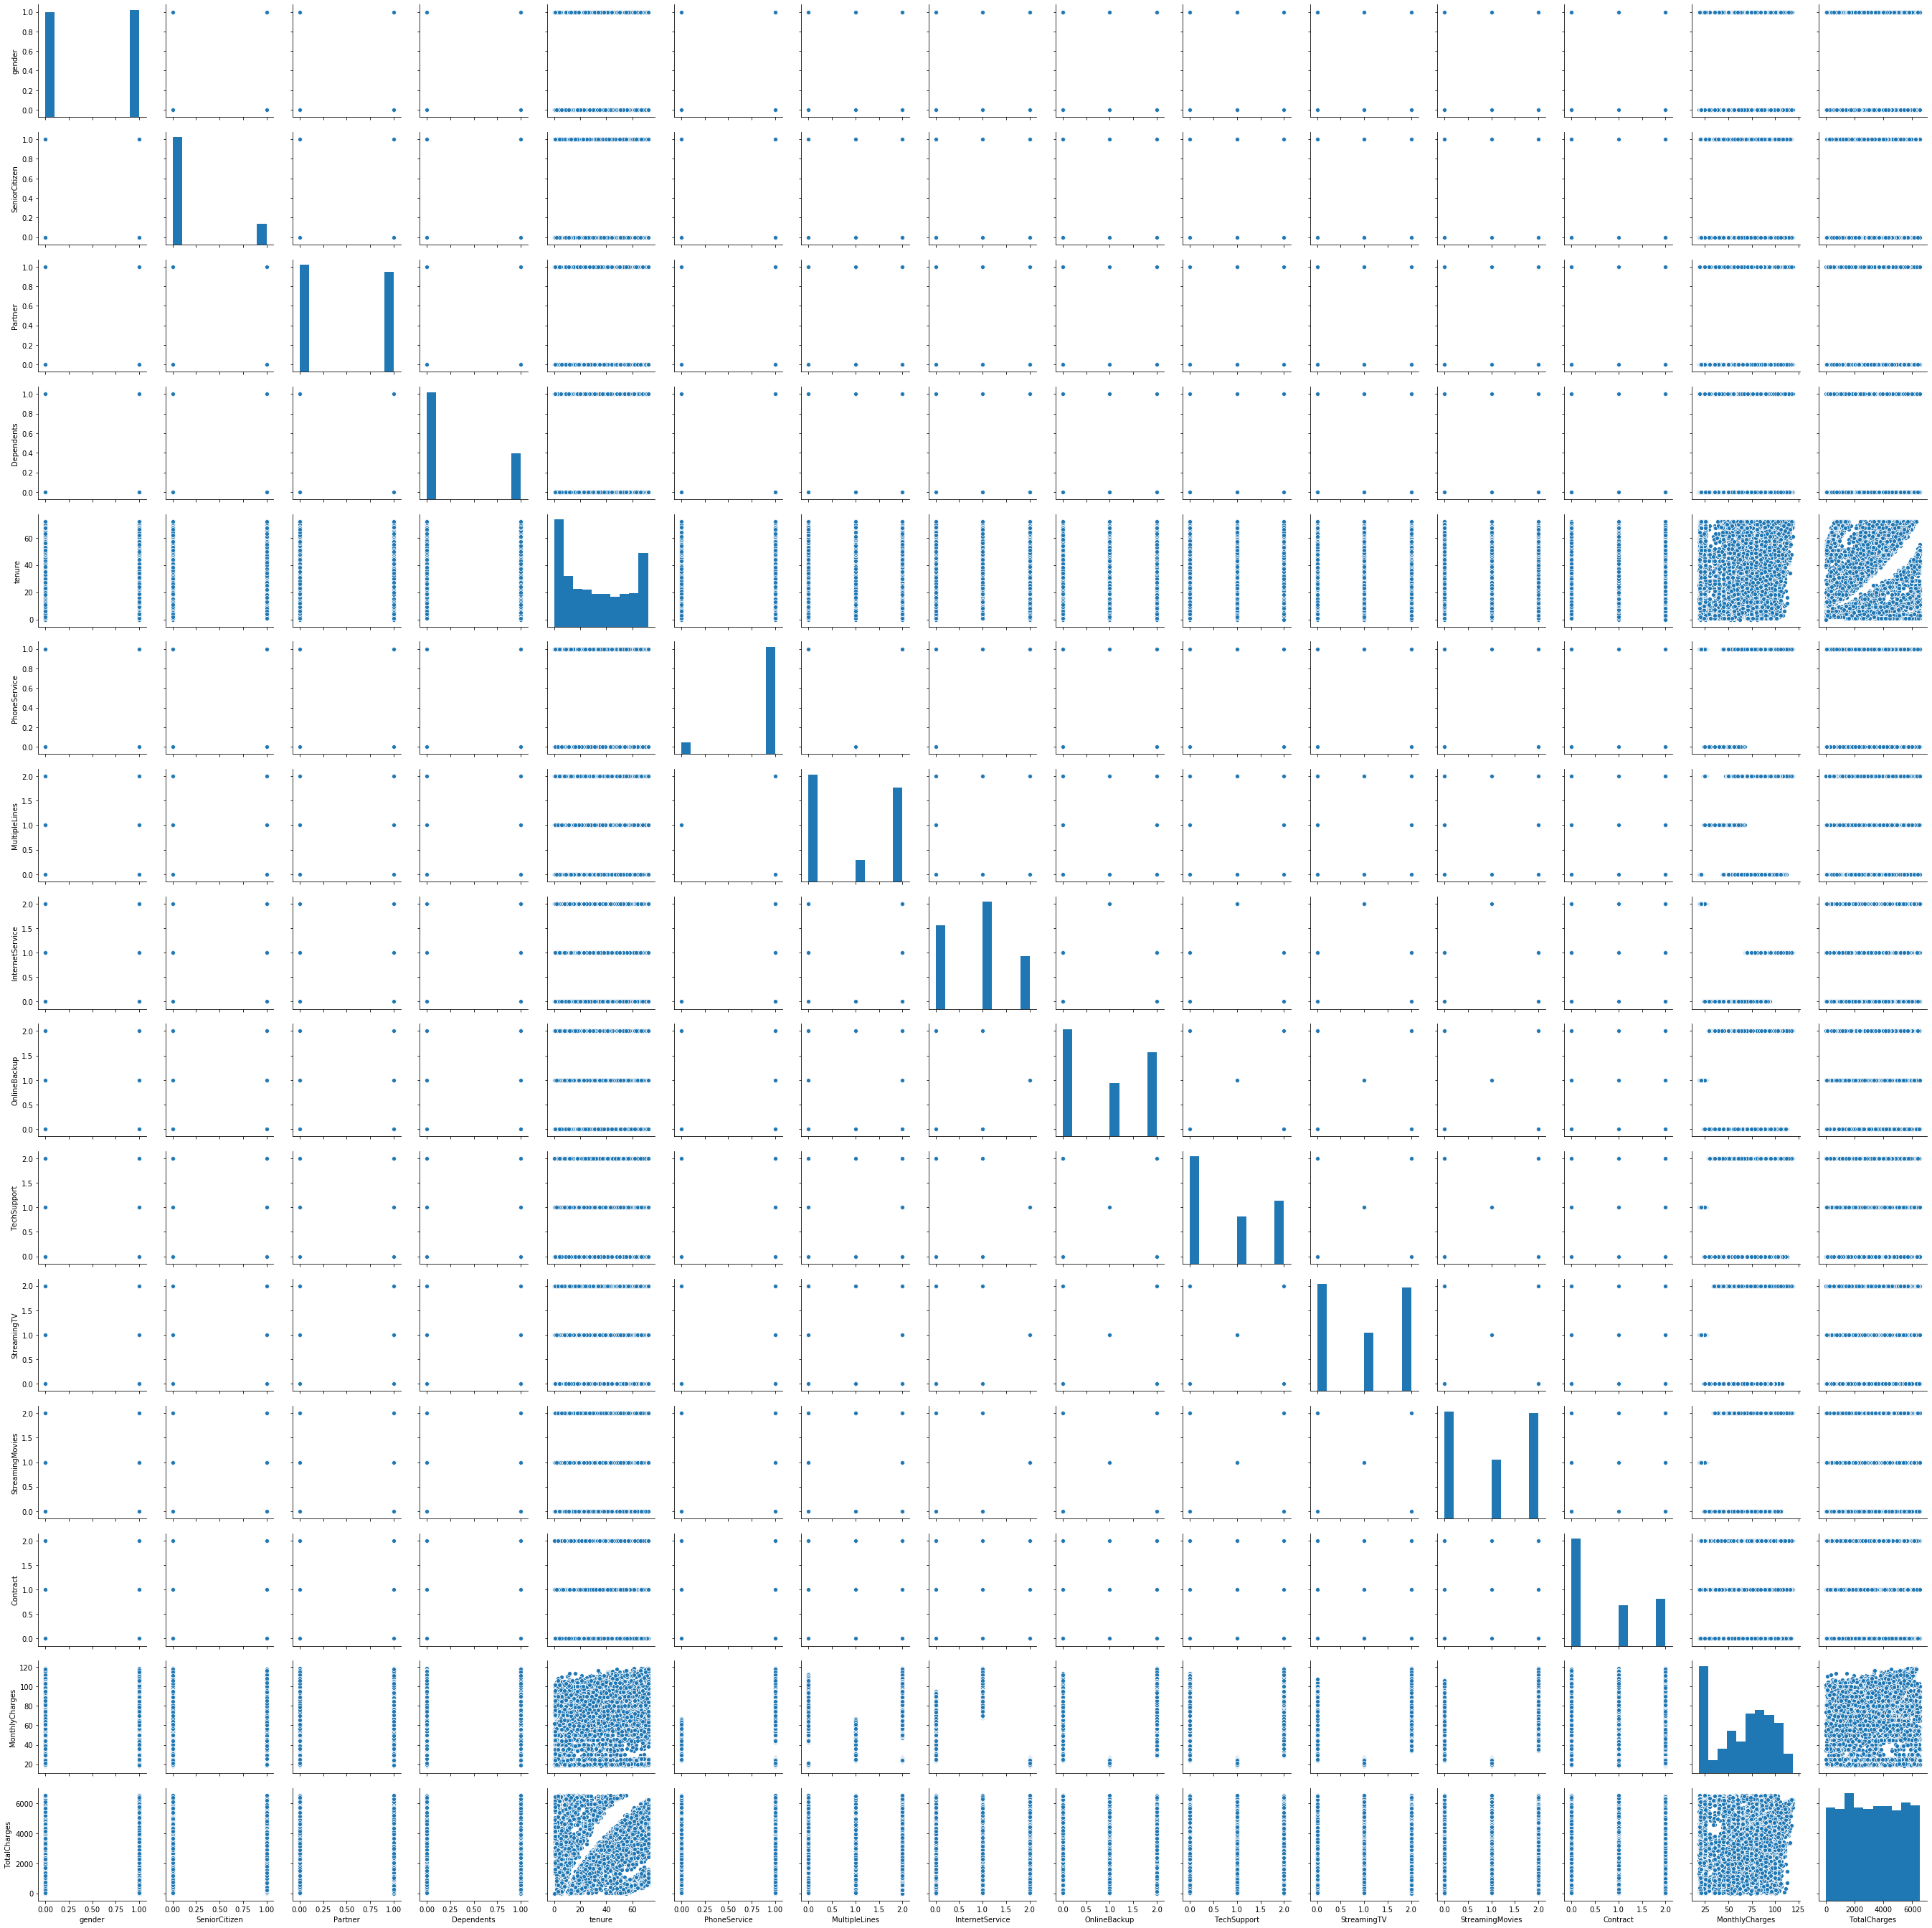

In [46]:
sns.pairplot(df4)

In [47]:
df4.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.012057,-0.006825,-0.006421,-0.008743,0.000126,-0.014569,-0.005291
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.013632,-0.151268,0.030776,0.047266,-0.142554,0.220173,0.037653
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.153130,0.126733,0.137341,0.129574,0.294806,0.096848,0.059568
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.091015,0.133524,0.046885,0.021321,0.243187,-0.113890,-0.009572
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.370876,0.322942,0.289373,0.296866,0.671607,0.247900,0.158523
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,0.024105,-0.019158,0.055353,0.043870,0.002247,0.247398,0.083195
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.117327,0.011466,0.175059,0.180957,0.110842,0.433576,0.114955
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,0.036138,-0.026047,0.107417,0.098350,0.099721,-0.323260,-0.055724
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,1.000000,0.195748,0.147186,0.136722,0.280980,0.119777,0.090756
TechSupport,-0.006825,-0.151268,0.126733,0.133524,0.322942,-0.019158,0.011466,-0.026047,0.195748,1.000000,0.161305,0.161316,0.425367,-0.008682,0.057488


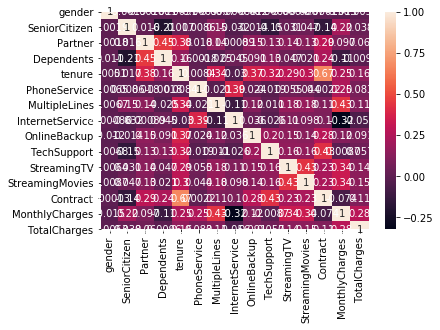

In [48]:
sns.heatmap(df4.corr(),annot=True)

## 4. Data pre-processing: [ Score: 5 point ]
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.


In [49]:
X= df4.drop('Churn',axis =1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,2,0,0,0,0,29.85,2505
1,1,0,0,0,34,1,0,0,0,0,0,0,1,56.95,1466
2,1,0,0,0,2,1,0,0,2,0,0,0,0,53.85,157
3,1,0,0,0,45,0,1,0,0,2,0,0,1,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,70.70,925


In [50]:
y=df4['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [51]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 10)

In [53]:
X_train.shape

(5634, 15)

In [54]:
X_test.shape

(1409, 15)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [56]:
X_train_std

array([[ 0.99468929, -0.44148597, -0.96854556, ..., -0.82377655,
        -0.37159936, -0.26093602],
       [-1.00533907, -0.44148597,  1.03247596, ..., -0.82377655,
        -0.45987897,  1.23058509],
       [ 0.99468929,  2.26507764,  1.03247596, ..., -0.82377655,
         0.73106288, -1.20432312],
       ...,
       [-1.00533907, -0.44148597,  1.03247596, ..., -0.82377655,
        -1.47925856,  0.7431773 ],
       [ 0.99468929,  2.26507764,  1.03247596, ..., -0.82377655,
         1.01422387,  1.00046469],
       [ 0.99468929, -0.44148597, -0.96854556, ...,  0.37517904,
         0.12976217,  0.12632679]])

## 5. Model training, testing and tuning: [ Score: 25 point ]
• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

In [57]:
from sklearn.metrics import confusion_matrix , classification_report 
def fitPrint(model , X_train, y_train , X_test, y_test): 
    model.fit(X_train,y_train) 
    predict = model.predict(X_test) 
    
    print("Training Accuracy : ", model.score(X_train, y_train)) 
    print("Test Accuracy : ", model.score(X_test, y_test)) 
    print("#" * 50) 
    print(confusion_matrix(y_test, predict)) 
    print(classification_report(y_test, predict))

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 

fitPrint(lr, X_train_std, y_train , X_test_std , y_test)

Training Accuracy :  0.7965921192758253
Test Accuracy :  0.8055358410220014
##################################################
[[958 108]
 [166 177]]
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1066
         Yes       0.62      0.52      0.56       343

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ()

fitPrint(knn, X_train_std, y_train , X_test_std , y_test)

Training Accuracy :  0.8313809016684416
Test Accuracy :  0.7821149751596878
##################################################
[[921 145]
 [162 181]]
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1066
         Yes       0.56      0.53      0.54       343

    accuracy                           0.78      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409



## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier ()

fitPrint(rfc, X_train_std, y_train , X_test_std , y_test)

Training Accuracy :  0.9952076677316294
Test Accuracy :  0.7920511000709723
##################################################
[[942 124]
 [169 174]]
              precision    recall  f1-score   support

          No       0.85      0.88      0.87      1066
         Yes       0.58      0.51      0.54       343

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.78      0.79      0.79      1409



## Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 500)

fitPrint(gbc, X_train_std, y_train , X_test_std , y_test)

Training Accuracy :  0.8722044728434505
Test Accuracy :  0.7991483321504613
##################################################
[[952 114]
 [169 174]]
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1066
         Yes       0.60      0.51      0.55       343

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



## CHECK FEATURE IMPORTANCE 

In [62]:
feat_imp = pd.DataFrame({"Features" : X_train.columns , "Importance" : gbc.feature_importances_}) 
feat_imp.sort_values(by= 'Importance' , ascending= False)

,Features,Importance
12,Contract,0.326517
13,MonthlyCharges,0.214100
4,tenure,0.154554
14,TotalCharges,0.154532
9,TechSupport,0.072331
7,InternetService,0.013215
8,OnlineBackup,0.013213
6,MultipleLines,0.010625
1,SeniorCitizen,0.010036
11,StreamingMovies,0.008083


## AdaBoosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()

fitPrint(adc, X_train_std, y_train , X_test_std , y_test)

Training Accuracy :  0.7988995385161519
Test Accuracy :  0.8048261178140526
##################################################
[[953 113]
 [162 181]]
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1066
         Yes       0.62      0.53      0.57       343

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



## Stacking

In [64]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\barca\anaconda3\lib\site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.ensemble import StackingClassifier 
estimators = [('lr' ,lr) , ('rfc' ,rfc),('gbc' , gbc) , ('adc',adc)] 

clf = StackingClassifier(estimators = estimators , final_estimator = rfc) 
fitPrint(clf, X_train_std, y_train, X_test_std, y_test)

Training Accuracy :  0.8077742279020235
Test Accuracy :  0.8026969481902059
##################################################
[[960 106]
 [172 171]]
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1066
         Yes       0.62      0.50      0.55       343

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.80      1409



In [66]:
# from the pair plot we can see that contract have strong relationship with tenure
# hence we will drop tenure from the dataframe

df4=df4.drop('tenure', axis=1)
df4.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,2,0,0,0,0,29.85,2505,No
1,1,0,0,0,1,0,0,0,0,0,0,1,56.95,1466,No
2,1,0,0,0,1,0,0,2,0,0,0,0,53.85,157,Yes
3,1,0,0,0,0,1,0,0,2,0,0,1,42.30,1400,No
4,0,0,0,0,1,0,1,0,0,0,0,0,70.70,925,Yes


In [ ]:
## Hyperparameter is not taught in the class.